# Introduction

In [1]:
library(tidyverse)
library(data.table)
library(dtplyr)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# The code from the class

In [1]:
getwd()

[1] "/Users/alinezhad.f/Documents/AdvancedBiostatistics"

In [3]:
temp=readxl::read_xlsx("./hersdata.xlsx")

In [9]:
hersdata <- na.omit(temp)
head(hersdata)

HT,age,raceth,nonwhite,smoking,drinkany,exercise,physact,globrat,poorfair,⋯,LDL,HDL,TG,tchol1,LDL1,HDL1,TG1,SBP,DBP,age10
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
placebo,70,African American,yes,no,no,no,much more active,good,no,⋯,122.4,52,73,201,137.6,48,77,138,78,7.0
placebo,62,African American,yes,no,no,no,much less active,good,no,⋯,241.6,44,107,216,150.6,48,87,118,70,6.2
hormone therapy,69,White,no,no,no,no,about as active,good,no,⋯,166.2,57,154,254,156.0,66,160,134,78,6.9
placebo,64,White,no,yes,yes,no,much less active,good,no,⋯,116.2,56,159,207,122.6,57,137,152,72,6.4
placebo,65,White,no,no,no,no,somewhat less active,good,no,⋯,150.6,42,107,235,172.2,35,139,175,95,6.5
hormone therapy,68,African American,yes,no,yes,no,about as active,good,no,⋯,137.8,52,111,202,126.6,53,112,174,98,6.8


In [ ]:
# Example with hersdata
# Waist to hip ratio
summary(hersdata$WHR)
hist(hersdata$WHR)
# BMI
summary(hersdata$BMI)
hist(hersdata$BMI,breaks=16,main="BMI")
# Association BMI and WHR
plot(hersdata$WHR,hersdata$BMI,pch=".")
cor(hersdata$WHR,hersdata$BMI)
cor(hersdata$WHR,hersdata$BMI,use = "complete.obs")
cor.test(hersdata$WHR,hersdata$BMI)
Model0 <- lm(WHR~BMI,data=hersdata)
summary(Model0)
anova(Model0)
confint(Model0)
temp<-subset(hersdata,select=c(WHR,BMI))
hersdata1<-na.omit(temp)
rm(temp)
plot(WHR~BMI,data=hersdata1,pch=".")
abline(lm(WHR~BMI,data=hersdata1))
# Attaching files
attach(hersdata)
Model1<-lm(WHR~BMI)
summary(Model1)
detach(hersdata)
list.files()
# Residuals
r1<-hersdata1$WHR - fitted(Model1)
summary(r1)
r2<-Model1$residuals
plot(r1~r2)
# Plots
install.packages("ggplot2")
library(ggplot2)
plt1 <-ggplot(hersdata1,aes(x=BMI, y=WHR))
plt1+geom_point(size=0.5)+
    geom_smooth(method = lm, se=FALSE)
# Model Assumptions - Linearity
Model2<-lm(WHR~BMI,data=hersdata1)
Res2 <- Model2$residuals
Fit2 <- Model2$fitted.values
scatter.smooth(hersdata1$BMI,hersdata1$WHR, 
               cex=0.1, col="gray")
scatter.smooth(Fit2,Res2, cex=0.1, col="gray")
BMI4<-cut(hersdata1$BMI,right=FALSE, breaks = c(15,25,30,35,55))
table(BMI4)
summary(hersdata1$BMI)
tapply(hersdata1$WHR,BMI4,FUN=mean)
ModelA <-lm(hersdata1$WHR~BMI4)
summary(ModelA)
plot(ModelA$fitted.values~hersdata1$BMI,pch=20)
BMIPW<-ifelse(hersdata1$BMI<30,0,hersdata1$BMI-30)
plot(BMIPW~hersdata1$BMI,pch=20)
ModelB<-lm(hersdata1$WHR~hersdata1$BMI+BMIPW)
summary(ModelB)
plot(ModelB$fitted.values~hersdata1$BMI)
BMISQ<-hersdata1$BMI*hersdata1$BMI
ModelC<-lm(WHR~BMI+BMISQ,data=hersdata1)
summary(ModelC)
plot(ModelC$fitted.values~hersdata1$BMI)
AIC(ModelA)
AIC(ModelB)
AIC(ModelC)
# Constant variance
SRES<-sqrt(abs(rstandard(Model1)))
scatter.smooth(SRES~fitted(Model1), cex=0.1, col="gray") 
plot(Model1)  
# Non-normality
hist(Model1$residuals)
qqnorm(Model1$residuals,cex=0.5)
qqline(Model1$residuals)
shapiro.test(residuals(Model1))
# Influence statistics
hatvalues(Model1)
plot(hatvalues(Model1)~hersdata1$BMI,pch=20)
plot(Model1)
plot(cooks.distance(Model1)~hersdata1$BMI)
BMIx<-hersdata1$BMI[cooks.distance(Model1)<0.01]
WHRx<-hersdata1$WHR[cooks.distance(Model1)<0.01]
lm(WHRx~BMIx)
lm(WHR~BMI,data=hersdata1)


# Schizophrenia

In [7]:
szd<-readxl::read_xlsx("./SZD.xlsx")%>% as.data.table()

In [8]:
head(szd)
summary(szd)

SX,AGE,SMOKE,Cotinine,nAChR
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0,55,No,2.00,18.53
0,83,No,9.03,11.73
0,52,NA,5.60,19.01
0,74,No,2.00,25.93
0,61,No,2.00,21.66
0,56,NA,103.11,25.54


       SX              AGE           SMOKE              Cotinine      
 Min.   :0.0000   Min.   :30.00   Length:24          Min.   :  2.000  
 1st Qu.:0.0000   1st Qu.:54.25   Class :character   1st Qu.:  4.617  
 Median :0.0000   Median :69.50   Mode  :character   Median : 66.120  
 Mean   :0.4583   Mean   :66.04                      Mean   : 48.581  
 3rd Qu.:1.0000   3rd Qu.:80.75                      3rd Qu.: 84.778  
 Max.   :1.0000   Max.   :94.00                      Max.   :113.770  
     nAChR      
 Min.   :10.30  
 1st Qu.:15.28  
 Median :18.77  
 Mean   :19.21  
 3rd Qu.:24.12  
 Max.   :30.69  

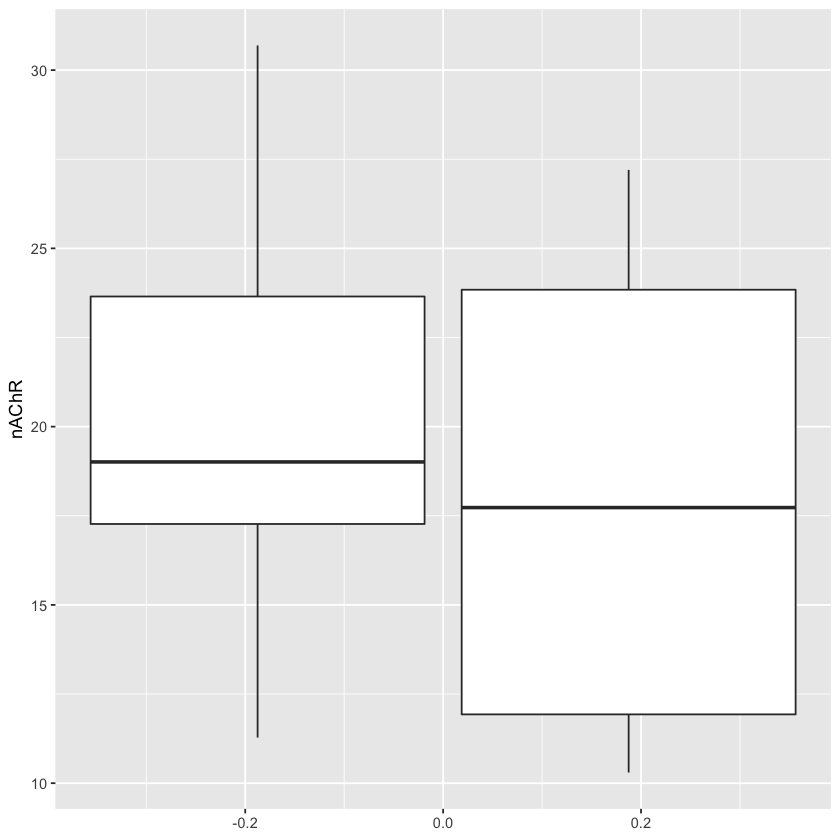

In [9]:
ggplot(data=szd)+
geom_boxplot(aes(group=SX,y=nAChR))

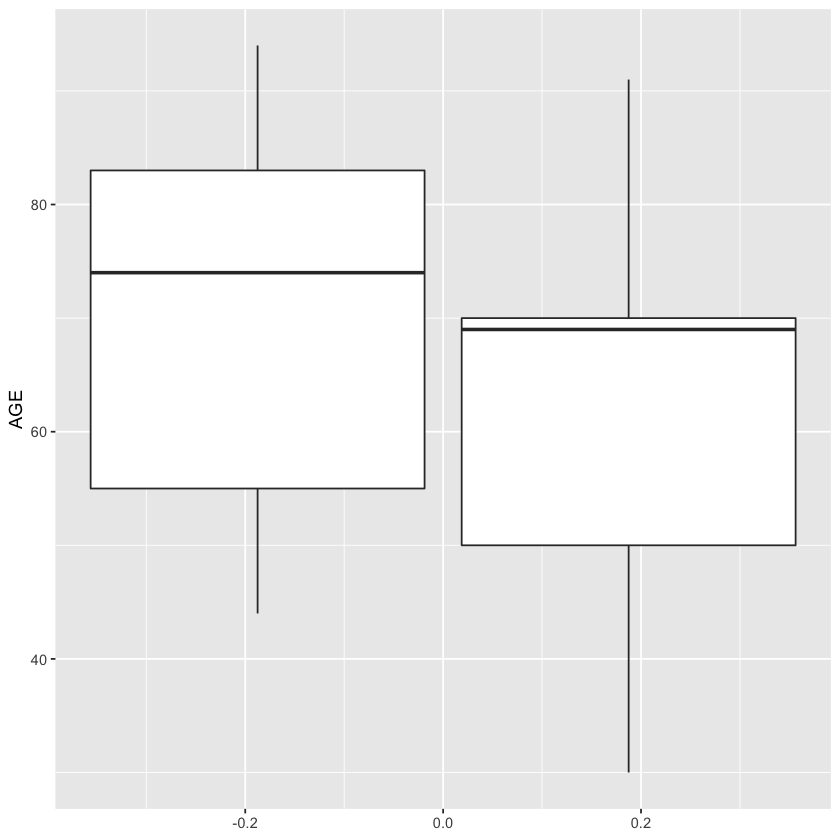

In [10]:
ggplot(data=szd)+
geom_boxplot(aes(group=SX,y=AGE))

`geom_smooth()` using formula 'y ~ x'



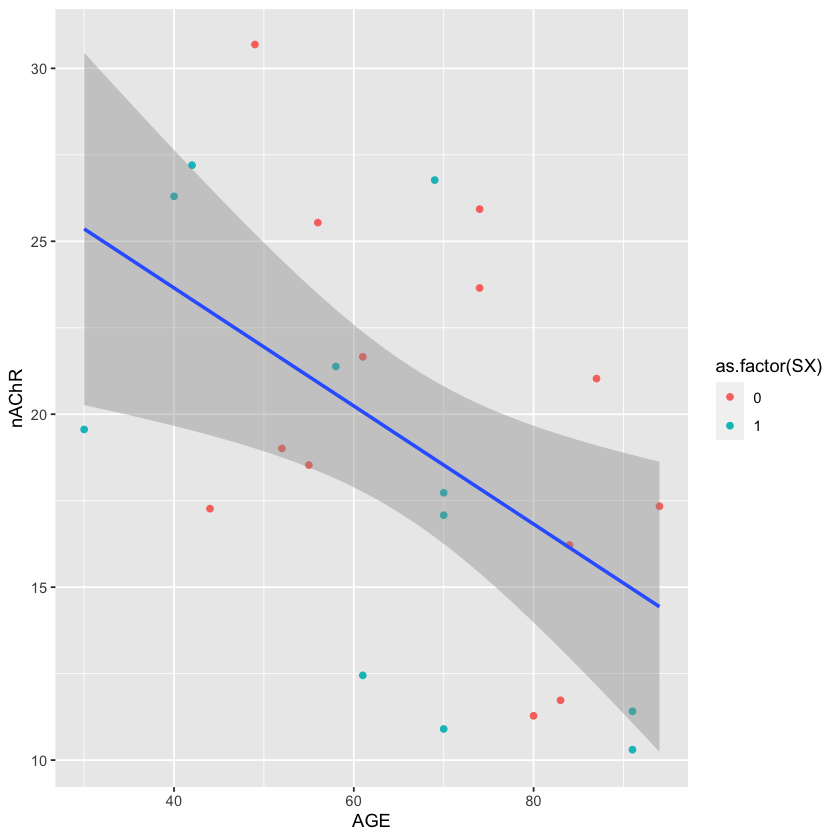

In [11]:
ggplot(data=szd)+
geom_point(aes(color=as.factor(SX),y=nAChR,x=AGE))+geom_smooth(aes(x=AGE,y=nAChR),method = "lm")

`geom_smooth()` using formula 'y ~ x'



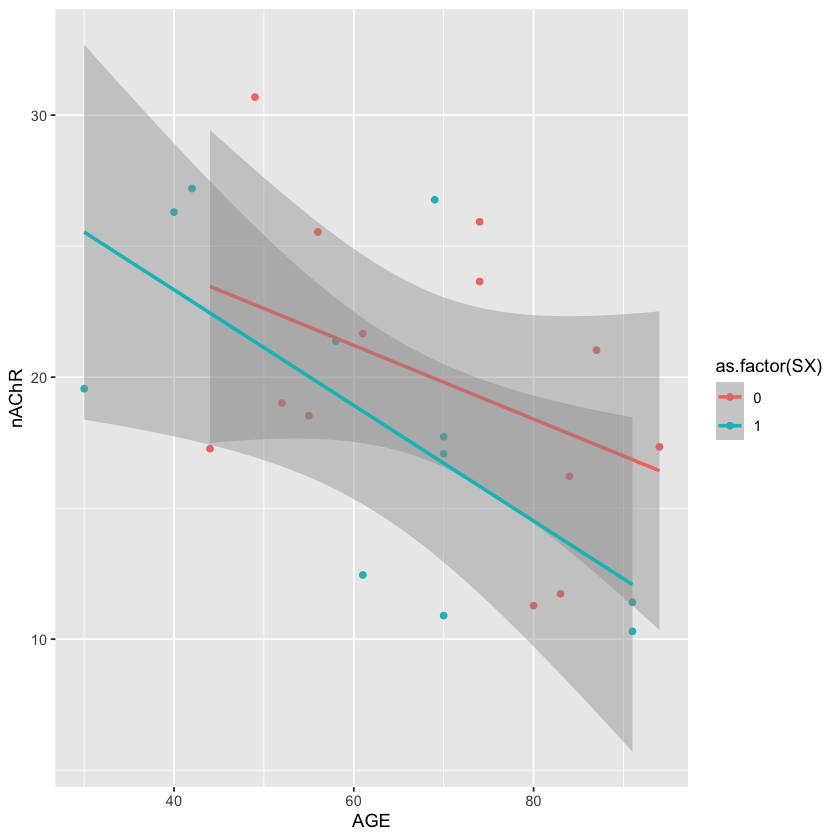

In [12]:
ggplot(data=szd)+
geom_point(aes(color=as.factor(SX),y=nAChR,x=AGE))+geom_smooth(aes(x=AGE,y=nAChR,color=as.factor(SX)),method = "lm")

In [13]:
schizo_model <- lm(data = szd,formula = nAChR~SX)
summary(schizo_model)


Call:
lm(formula = nAChR ~ SX, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7108 -4.2856 -0.7654  4.1317 10.6992 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   19.991      1.675  11.938 4.39e-11 ***
SX            -1.711      2.473  -0.692    0.496    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.038 on 22 degrees of freedom
Multiple R-squared:  0.02128,	Adjusted R-squared:  -0.0232 
F-statistic: 0.4784 on 1 and 22 DF,  p-value: 0.4964


In [14]:
schizo_model_age_adj <- lm(data = szd,formula = nAChR~SX+AGE)
summary(schizo_model_age_adj)


Call:
lm(formula = nAChR ~ SX + AGE, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2578 -4.2276  0.1794  3.9587  9.6092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.61258    4.44668   7.334 3.22e-07 ***
SX          -2.77340    2.14782  -1.291  0.21065    
AGE         -0.18374    0.06127  -2.999  0.00684 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.171 on 21 degrees of freedom
Multiple R-squared:  0.3147,	Adjusted R-squared:  0.2495 
F-statistic: 4.822 on 2 and 21 DF,  p-value: 0.01891


In [15]:
model1= lm(data = szd,formula = nAChR~1)
anova(model1,schizo_model_age_adj)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,819.3865,NA,NA,NA,NA
2,21,561.5065,2,257.88,4.822277,0.01890571


As we can see, the F stat of the model equals the F stat of the ANOVA. This can be used to test the effects of a group of variables on the model on more complex models.

In [16]:
szd[,sum(!is.na(SMOKE))]
szd[,sum(is.na(SMOKE))]

[1] 11

[1] 13

In [17]:
szd[,sum(!is.na(Cotinine))]
szd[,sum(is.na(Cotinine))]

[1] 24

[1] 0

In [18]:
szd[,.(mean=mean(Cotinine),min=min(Cotinine),max=max(Cotinine)),by=SMOKE]

SMOKE,mean,min,max
<chr>,<dbl>,<dbl>,<dbl>
No,3.171667,2.00,9.03
NA,53.438462,4.40,108.62
Yes,90.444000,78.54,113.77


Since smoking is correlated well with Cotinine, we can use Cotinine as a measure of smoking.

In [19]:
schizo_model_age_cot_adj <- lm(data = szd,formula = nAChR~SX+AGE+Cotinine)
summary(schizo_model_age_cot_adj)


Call:
lm(formula = nAChR ~ SX + AGE + Cotinine, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7224 -1.9906  0.0022  2.5817  8.6512 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.19809    4.43875   5.902 8.98e-06 ***
SX          -5.69637    2.11388  -2.695  0.01394 *  
AGE         -0.12260    0.05698  -2.152  0.04382 *  
Cotinine     0.07649    0.02665   2.870  0.00947 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.459 on 20 degrees of freedom
Multiple R-squared:  0.5146,	Adjusted R-squared:  0.4418 
F-statistic: 7.068 on 3 and 20 DF,  p-value: 0.002007


## Test interaction

In [20]:
schizo_model_age_cot_adj_interaction <- lm(data = szd,formula = nAChR~AGE+SX*Cotinine)
summary(schizo_model_age_cot_adj_interaction)


Call:
lm(formula = nAChR ~ AGE + SX * Cotinine, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3601 -2.4486  0.1202  2.8505  8.8558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.43638    4.60087   5.746 1.55e-05 ***
AGE         -0.12876    0.06132  -2.100   0.0494 *  
SX          -4.75635    3.62161  -1.313   0.2047    
Cotinine     0.08287    0.03365   2.463   0.0235 *  
SX:Cotinine -0.01740    0.05376  -0.324   0.7498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.563 on 19 degrees of freedom
Multiple R-squared:  0.5173,	Adjusted R-squared:  0.4156 
F-statistic:  5.09 on 4 and 19 DF,  p-value: 0.005851


This means that if the variable SX is 1, then we should subtract 0.01740 from 0.08287, which is the base coefficient for the cotinine. We do not do this subtraction for people with SX=0.

## SJplot
nice for interaction plots

In [42]:
library(sjPlot)

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



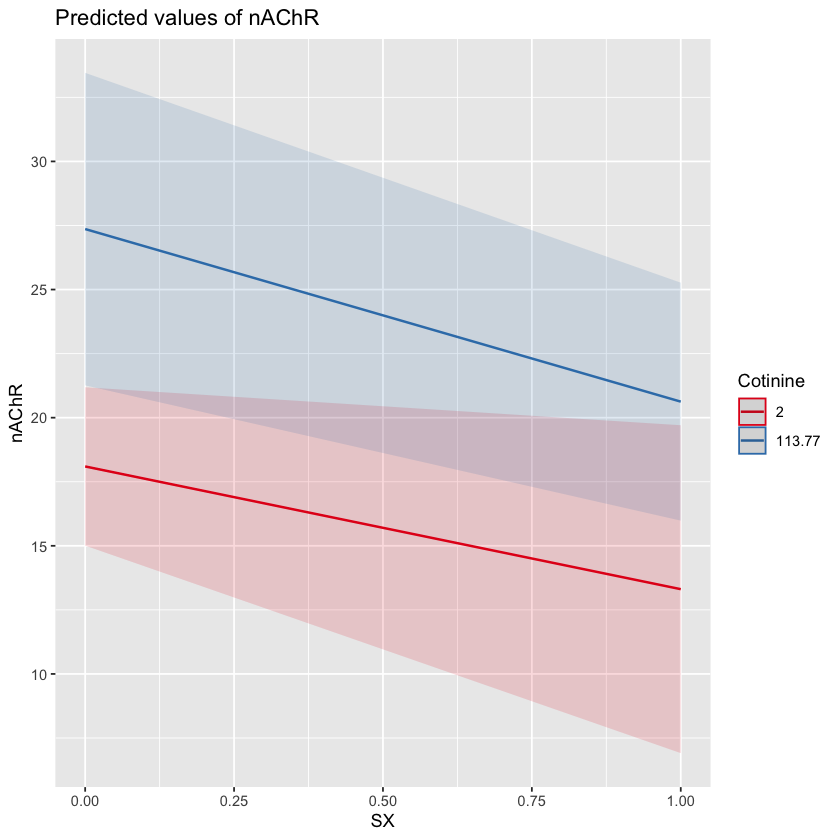

In [45]:
plot_model(schizo_model_age_cot_adj_interaction,type="int")

## Understanding interactions
if there is an interaction (significant statistically), we can go further and remove the interaction term from the model and include the actuall interaction within the variables.

In [48]:
schizo_model_age_cot_adj_interaction <- lm(data = szd,formula = nAChR~AGE+SX+AGE:SX)
summary(schizo_model_age_cot_adj_interaction)


Call:
lm(formula = nAChR ~ AGE + SX + AGE:SX, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1196 -3.9947  0.4753  3.6524  9.8333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.65685    6.45455   4.595 0.000175 ***
AGE         -0.14072    0.09155  -1.537 0.139937    
SX           2.49707    8.51611   0.293 0.772377    
AGE:SX      -0.07982    0.12469  -0.640 0.529318    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.245 on 20 degrees of freedom
Multiple R-squared:  0.3285,	Adjusted R-squared:  0.2278 
F-statistic: 3.261 on 3 and 20 DF,  p-value: 0.04296


In [49]:
schizo_model_age_cot_adj_interaction <- lm(data = szd,formula = nAChR~SX+AGE0<-ifelse(SX==0,AGE,0)
+AGE1<-ifelse(SX==1,AGE,0))

ERROR: Error in ifelse(SX == 1, AGE, 0): object 'SX' not found


## Plot models

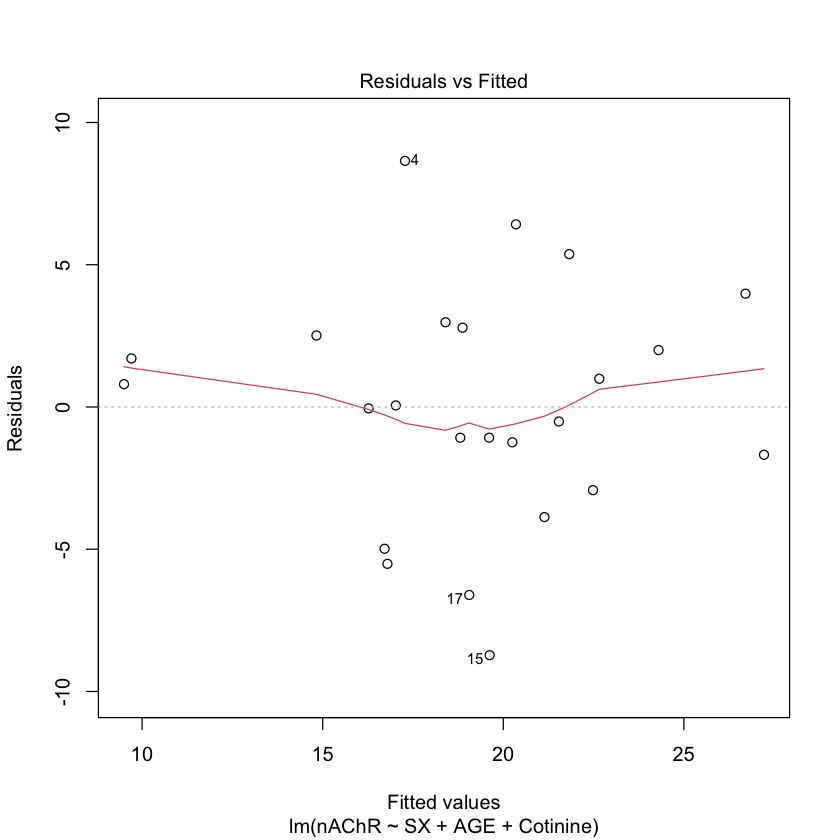

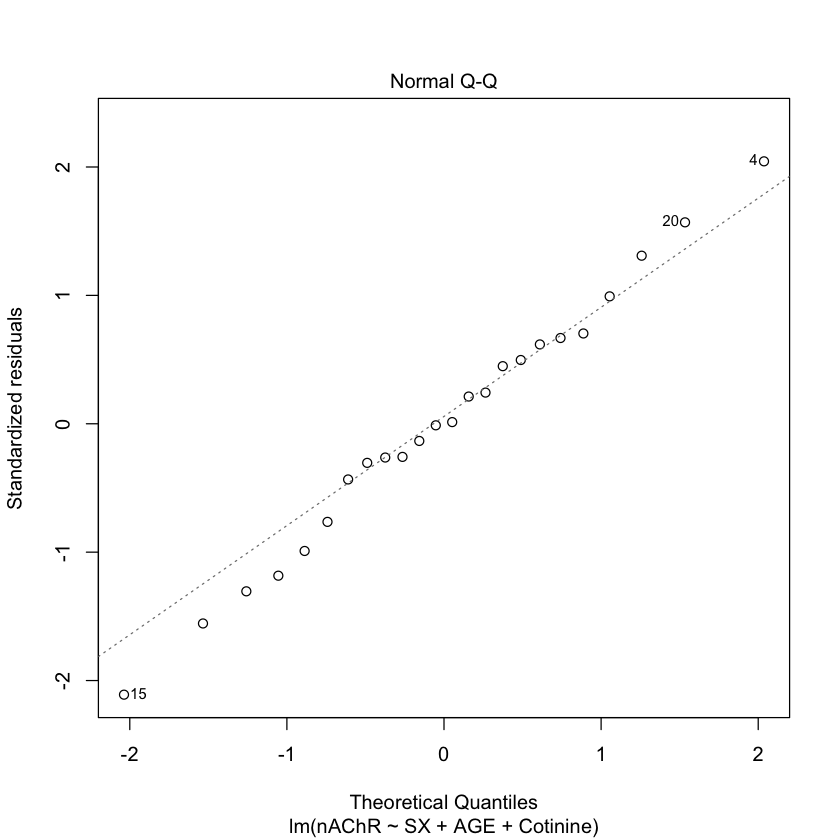

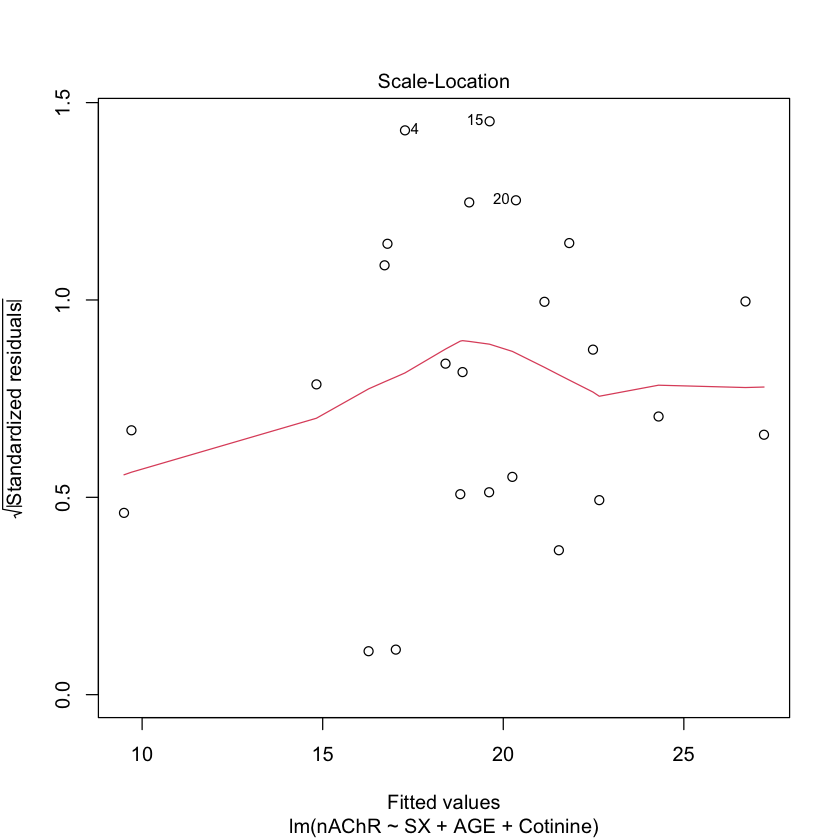

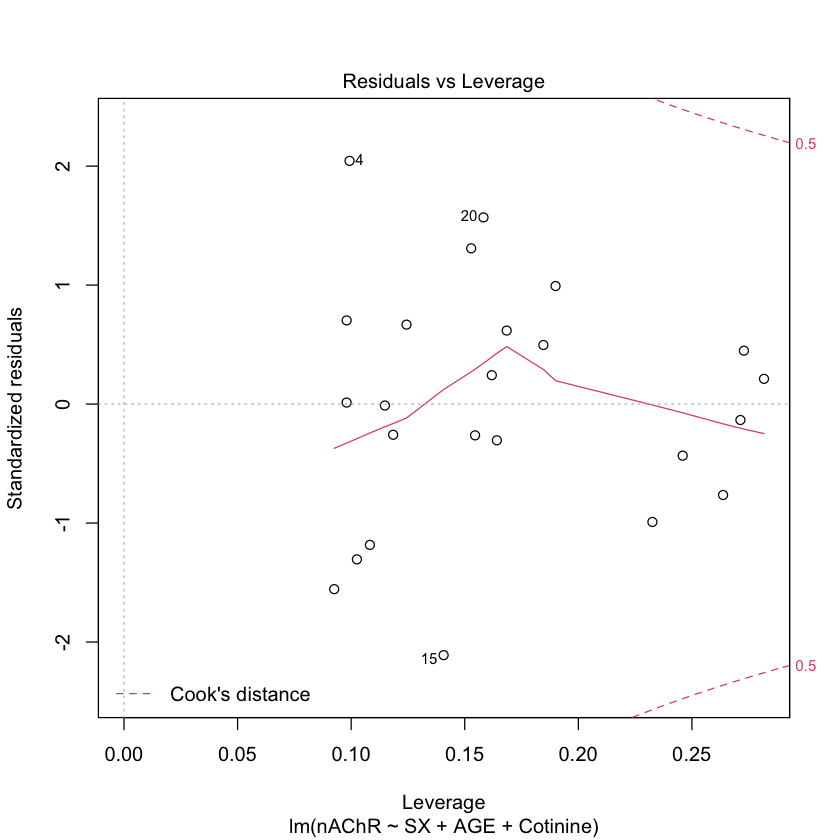

In [ ]:
plot(schizo_model_age_cot_adj)

## Finding higher leverage points

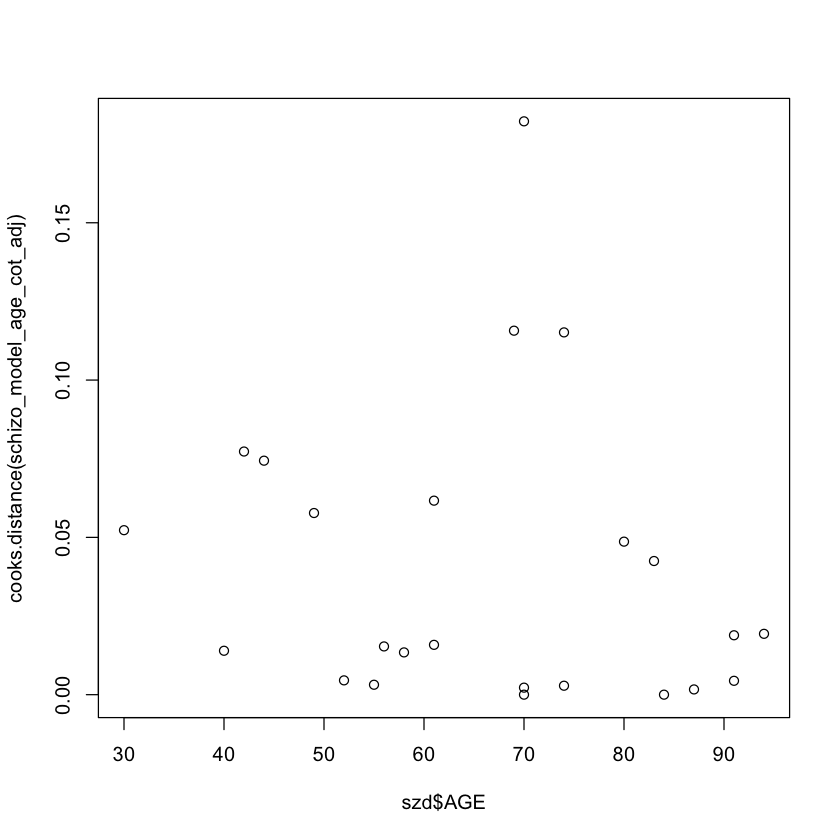

In [23]:
plot(szd$AGE,cooks.distance(schizo_model_age_cot_adj))

Here, we find the points that are farther away
High leverage, high resuduals, high probability for being an outlier that affects the model disproportionately 

In [25]:
data.table(szd,hatvalues(schizo_model_age_cot_adj))

SX,AGE,SMOKE,Cotinine,nAChR,V2
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,55,No,2.00,18.53,0.15454591
0,83,No,9.03,11.73,0.10823675
0,52,NA,5.60,19.01,0.16414318
0,74,No,2.00,25.93,0.09929515
0,61,No,2.00,21.66,0.12436510
0,56,NA,103.11,25.54,0.24594598
0,80,NA,5.27,11.28,0.10253237
0,84,NA,4.85,16.22,0.11485182
0,49,Yes,85.19,30.69,0.18997310


## Partial F stat
If you run the anova to compare two models, it will use the partial F to compare them.

In [26]:
anova(schizo_model,schizo_model_age_cot_adj)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,801.9481,NA,NA,NA,NA
2,20,397.7353,2,404.2128,10.16286,0.0009004902


We can see that the model with the added variables does perform significantly better.
For example, do the demographic variables, as a group, affect the model predictions.
Also, if we have a categorical variable with multiple categories, then, we can run a partial F test with and without the categorical variable and get the global effect of that variable.

In [30]:
szd[,age_3:=cut(AGE,breaks = c(30,60,75,95),right = F)]
szd

SX,AGE,SMOKE,Cotinine,nAChR,age_3
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
0,55,No,2.00,18.53,"[30,60)"
0,83,No,9.03,11.73,"[75,95)"
0,52,NA,5.60,19.01,"[30,60)"
0,74,No,2.00,25.93,"[60,75)"
0,61,No,2.00,21.66,"[60,75)"
0,56,NA,103.11,25.54,"[30,60)"
0,80,NA,5.27,11.28,"[75,95)"
0,84,NA,4.85,16.22,"[75,95)"
0,49,Yes,85.19,30.69,"[30,60)"


In [39]:
schizo_model_age3 <- lm(data = szd,formula = nAChR~age_3+SX+Cotinine)
schizo_model_no_age3 <- lm(data = szd,formula = nAChR~SX+Cotinine)
summary(schizo_model_age3)
anova(schizo_model_age3,schizo_model_no_age3)


Call:
lm(formula = nAChR ~ age_3 + SX + Cotinine, data = szd)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0443 -2.6431  0.5647  2.5847  7.3834 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.12337    2.05068  10.301 3.26e-09 ***
age_3[60,75) -2.71316    2.13473  -1.271   0.2191    
age_3[75,95) -6.44894    2.44767  -2.635   0.0163 *  
SX           -5.33240    2.07805  -2.566   0.0189 *  
Cotinine      0.06819    0.02716   2.510   0.0213 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.339 on 19 degrees of freedom
Multiple R-squared:  0.5634,	Adjusted R-squared:  0.4715 
F-statistic:  6.13 on 4 and 19 DF,  p-value: 0.002418


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,357.7150,NA,NA,NA,NA
2,21,489.8062,-2,-132.0912,3.508007,0.05050938


# Least square means
Plugs in the means of everything in a model except what we are looking for.
It gives us the "adjusted means".

In [33]:
library(lsmeans)

Loading required package: emmeans

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



In [34]:
lsmeans(schizo_model_age_cot_adj,~SX)

 SX lsmean   SE df lower.CL upper.CL
  0   21.8 1.33 20     19.0     24.6
  1   16.1 1.46 20     13.1     19.2

Confidence level used: 0.95 

This means, given the means of age and cotinine in the population, what are the adjusted means of nACHR in people with and without schizophrenia.

# HCOST data

In [55]:
hcosts=readxl::read_xlsx("HCosts.xlsx")%>%as.data.table()

In [57]:
hcosts[,region:=as.factor(region)]
hcosts[,HCOST:=ifelse(costs>median(costs),1,0)]

head(hcosts)

ID,region,sex,age,marit,alco,cigs,exer,costs,HCOST
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,71.65657,3,4,1,8.0,3147.48,0
2,4,0,72.92443,2,28,15,10.0,7086.23,1
3,3,1,85.60070,2,0,0,8.5,2104.22,0
4,3,1,72.69116,3,13,11,10.0,3907.60,0
5,5,0,78.72982,2,16,7,6.0,4091.27,0
6,5,0,72.38184,3,9,5,9.5,2933.38,0


In [64]:
model_hcosts=glm(data=hcosts,HCOST~region+age+sex+exer,family=binomial)
summary(model_hcosts)


Call:
glm(formula = HCOST ~ region + age + sex + exer, family = binomial, 
    data = hcosts)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.961  -1.053  -0.152   1.042   2.082  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71981    1.44676  -1.189   0.2345    
region2     -0.83822    0.32732  -2.561   0.0104 *  
region3     -0.62057    0.30435  -2.039   0.0414 *  
region4     -0.62989    0.28612  -2.202   0.0277 *  
region5     -0.49632    0.27500  -1.805   0.0711 .  
age          0.07391    0.01841   4.015 5.94e-05 ***
sex          0.28268    0.19457   1.453   0.1463    
exer        -0.42707    0.05674  -7.527 5.19e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 727.80  on 524  degrees of freedom
Residual deviance: 634.15  on 517  degrees of freedom
AIC: 650.15

Number of Fisher Scoring iterations: 4


In [69]:
cbind(
exp(model_hcosts$coefficients),
exp(confint(model_hcosts)))

Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.1791001,0.01009966,2.9671989
region2,0.4324793,0.22586247,0.8172417
region3,0.5376358,0.29466318,0.9736971
region4,0.5326516,0.30261130,0.9306174
region5,0.6087648,0.35383455,1.0415437
age,1.0767127,1.03943065,1.1173823
sex,1.3266749,0.90759009,1.9474832
exer,0.6524151,0.58139969,0.7264534


## Maximum likelihood testing
This does what partial F did for lm

In [70]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [71]:
model_1_hcosts=glm(data=hcosts,HCOST~region+age+sex+exer,family=binomial)
model_2_hcosts=glm(data=hcosts,HCOST~age+sex+exer,family=binomial)

lrtest(model_1_hcosts,
model_2_hcosts)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,-317.0740,NA,NA,NA
2,4,-321.5278,-4,8.907461,0.06345459


or

In [72]:
summary(model_1_hcosts)
summary(model_2_hcosts)


Call:
glm(formula = HCOST ~ region + age + sex + exer, family = binomial, 
    data = hcosts)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.961  -1.053  -0.152   1.042   2.082  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71981    1.44676  -1.189   0.2345    
region2     -0.83822    0.32732  -2.561   0.0104 *  
region3     -0.62057    0.30435  -2.039   0.0414 *  
region4     -0.62989    0.28612  -2.202   0.0277 *  
region5     -0.49632    0.27500  -1.805   0.0711 .  
age          0.07391    0.01841   4.015 5.94e-05 ***
sex          0.28268    0.19457   1.453   0.1463    
exer        -0.42707    0.05674  -7.527 5.19e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 727.80  on 524  degrees of freedom
Residual deviance: 634.15  on 517  degrees of freedom
AIC: 650.15

Number of Fisher Scoring iterations: 4



Call:
glm(formula = HCOST ~ age + sex + exer, family = binomial, data = hcosts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0380  -1.0532  -0.1872   1.0602   2.0082  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.39534    1.43101  -1.674   0.0942 .  
age          0.07620    0.01840   4.142 3.45e-05 ***
sex          0.26021    0.19242   1.352   0.1763    
exer        -0.42282    0.05609  -7.538 4.79e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 727.80  on 524  degrees of freedom
Residual deviance: 643.06  on 521  degrees of freedom
AIC: 651.06

Number of Fisher Scoring iterations: 3


In [ ]:
1-pchisq(651.74 - 634.15,1)
# anova(LRAG,LRF) 
# lrtest(LRAG,LRF) in lmtest package

## glm with log link
This is done to model the relative risk

# Absent dataset

## Poisson regression
used for count data with lots of zeros

In [74]:
absent=readxl::read_xlsx("absent.xlsx")%>%as.data.table()

In [75]:
head(absent)

id,gender,math,daysabs,prog
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,2,63,4,2
1002,2,27,4,2
1003,1,20,2,2
1004,1,16,3,2
1005,1,2,3,2
1006,1,71,13,2


In [77]:
summary(P1<-glm(daysabs~as.factor(prog)+math,family="poisson",data=absent))


Call:
glm(formula = daysabs ~ as.factor(prog) + math, family = "poisson", 
    data = absent)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2597  -2.2038  -0.9193   0.6511   7.4233  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.651974   0.060736  43.664  < 2e-16 ***
as.factor(prog)2 -0.439897   0.056672  -7.762 8.35e-15 ***
as.factor(prog)3 -1.281364   0.077886 -16.452  < 2e-16 ***
math             -0.006808   0.000931  -7.313 2.62e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2217.7  on 313  degrees of freedom
Residual deviance: 1774.0  on 310  degrees of freedom
AIC: 2665.3

Number of Fisher Scoring iterations: 5


### Overdispersion
The poisson has certain assumptions that generally do not hold (the tail is too short?)
For the Poisson model the residual deviance should be equal to the degrees of freedom.
Residual deviance: 1774.0  on 310  degrees of freedom
If dispersion is present then one can use a quasi-Poisson to correct standard errors.

In [79]:
summary(P2<-glm(daysabs~as.factor(prog)+math,family="quasipoisson",data=absent))


Call:
glm(formula = daysabs ~ as.factor(prog) + math, family = "quasipoisson", 
    data = absent)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2597  -2.2038  -0.9193   0.6511   7.4233  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.651974   0.156026  16.997  < 2e-16 ***
as.factor(prog)2 -0.439897   0.145584  -3.022  0.00272 ** 
as.factor(prog)3 -1.281364   0.200081  -6.404  5.6e-10 ***
math             -0.006808   0.002392  -2.847  0.00471 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 6.599244)

    Null deviance: 2217.7  on 313  degrees of freedom
Residual deviance: 1774.0  on 310  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


### Negative binomial

Can use deviance test to compare fit of negative binomial to Poisson models.

In [81]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [83]:
summary(P3<-glm.nb(daysabs~as.factor(prog)+math,link=log,data=absent))


Call:
glm.nb(formula = daysabs ~ as.factor(prog) + math, data = absent, 
    link = log, init.theta = 1.032713156)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1547  -1.0192  -0.3694   0.2285   2.5273  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.615265   0.197460  13.245  < 2e-16 ***
as.factor(prog)2 -0.440760   0.182610  -2.414   0.0158 *  
as.factor(prog)3 -1.278651   0.200720  -6.370 1.89e-10 ***
math             -0.005993   0.002505  -2.392   0.0167 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0327) family taken to be 1)

    Null deviance: 427.54  on 313  degrees of freedom
Residual deviance: 358.52  on 310  degrees of freedom
AIC: 1741.3

Number of Fisher Scoring iterations: 1


              Theta:  1.033 
          Std. Err.:  0.106 

 2 x log-likelihood:  -1731.258 

Modeling Assumptions
Logarithm of the event rate changes linearly 
Changes in the rate from combined effects of different exposures or risk factors are 
multiplicative. 
At each level of the covariates the number of cases has variance equal to the mean. 
Observations are independent
Risk factors have an equal exposure

# GEE (robust)

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
qsim=readxl::read_xlsx("QSim.xlsx")
head(qsim)

ID,INV,QoL
<dbl>,<dbl>,<dbl>
1,2.04,-1.65
2,3.15,0.28
3,3.92,3.97
4,2.24,-1.71
5,2.55,-0.91
6,3.70,0.32


`geom_smooth()` using formula 'y ~ x'



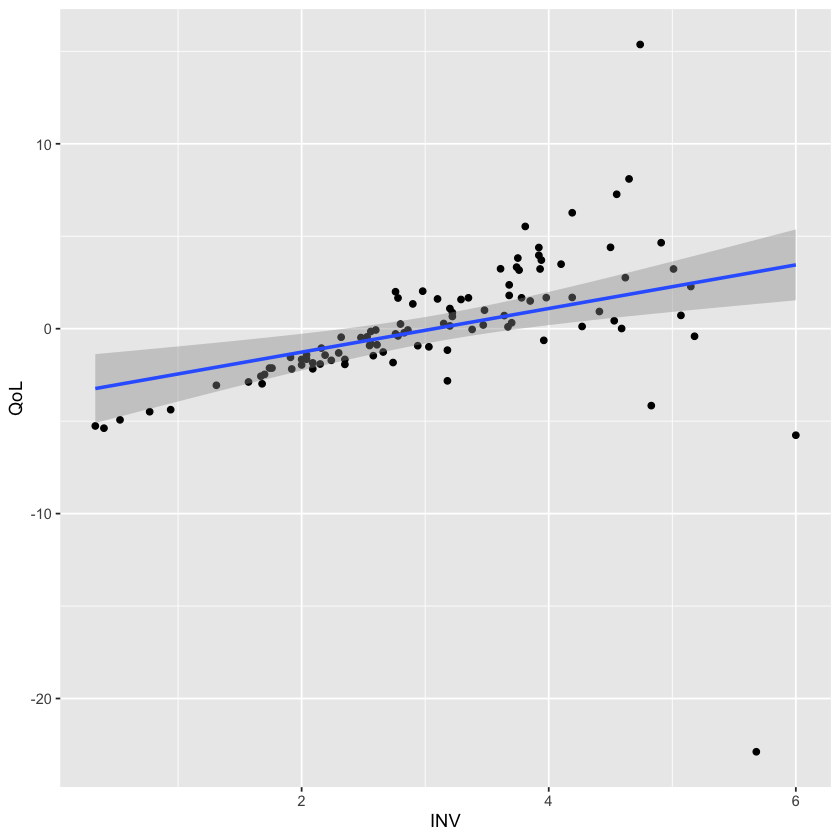

In [15]:
plot_qsim=ggplot(data=qsim)
plot_qsim+geom_point(aes(INV,QoL))+geom_smooth(aes(INV,QoL),method = "lm")


In [11]:
model_qsim=lm(data=qsim,QoL~INV)
summary(model_qsim)


Call:
lm(formula = QoL ~ INV, data = qsim)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9539  -0.8557  -0.1725   0.9812  13.4050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.6269     1.0338  -3.508 0.000683 ***
INV           1.1797     0.3108   3.796 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.605 on 98 degrees of freedom
Multiple R-squared:  0.1282,	Adjusted R-squared:  0.1193 
F-statistic: 14.41 on 1 and 98 DF,  p-value: 0.000255


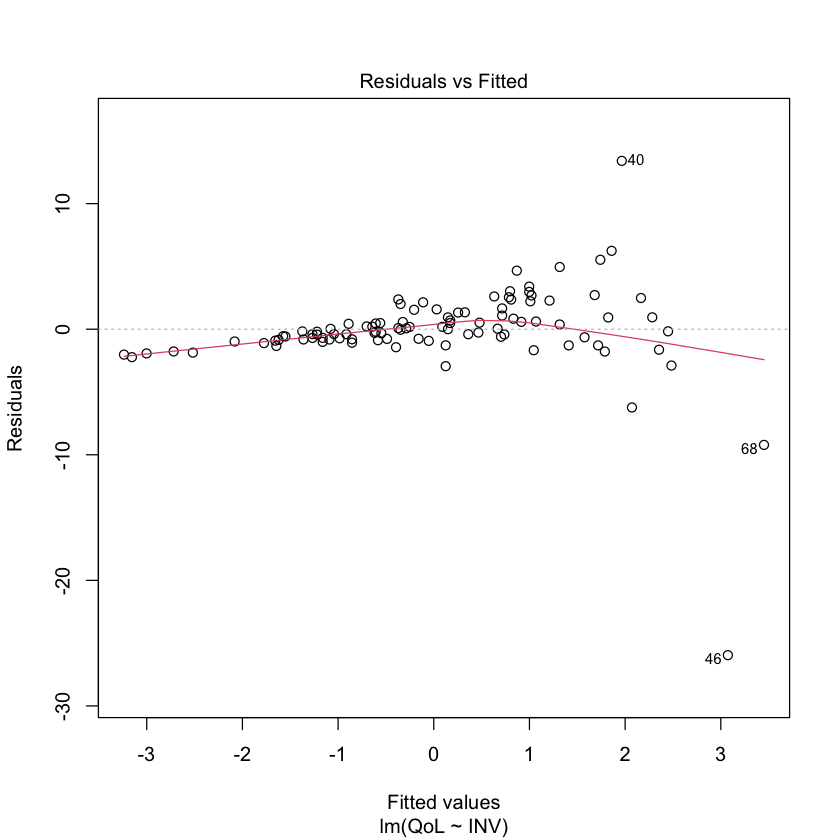

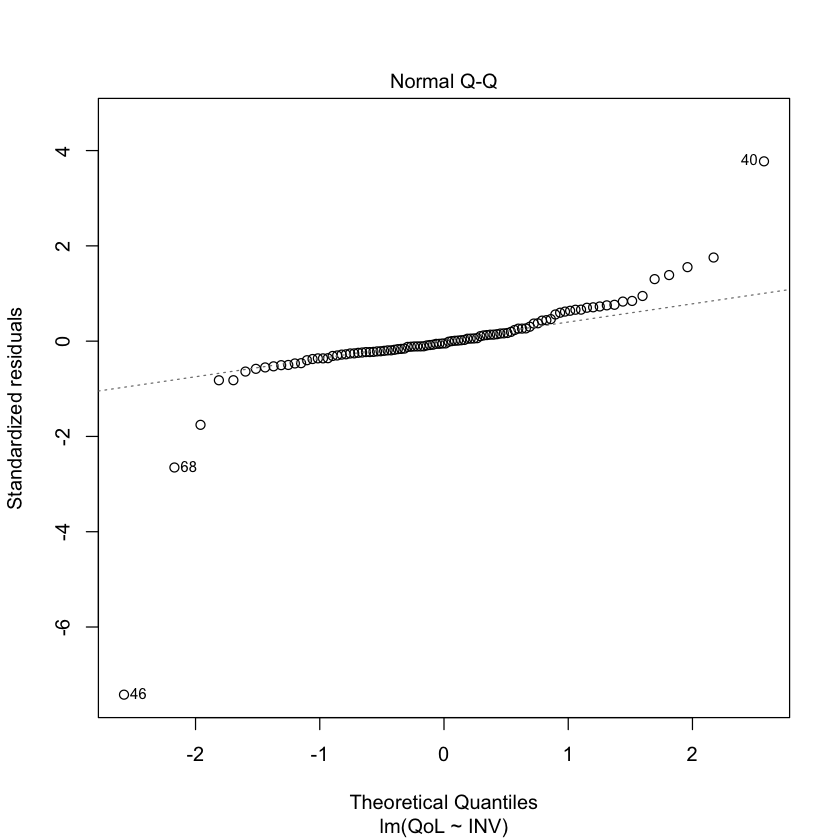

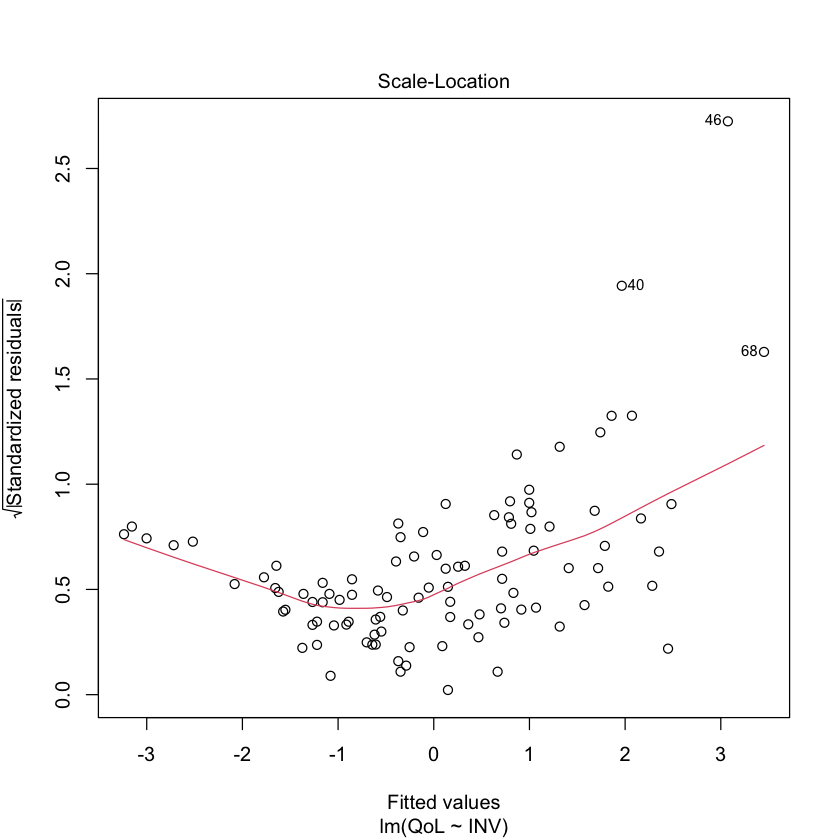

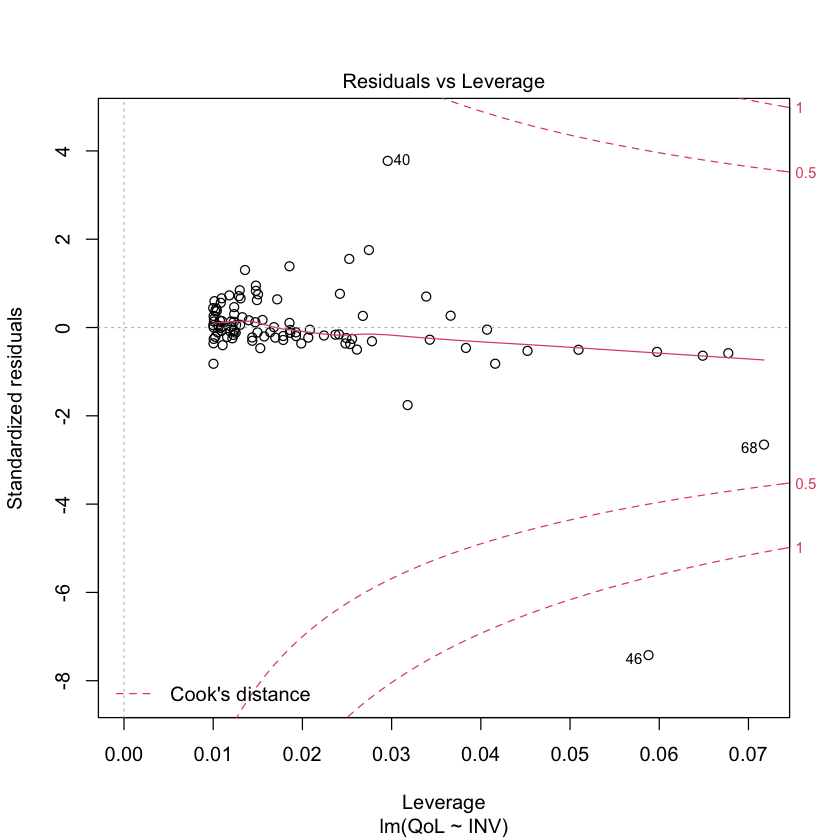

In [12]:
plot(model_qsim)

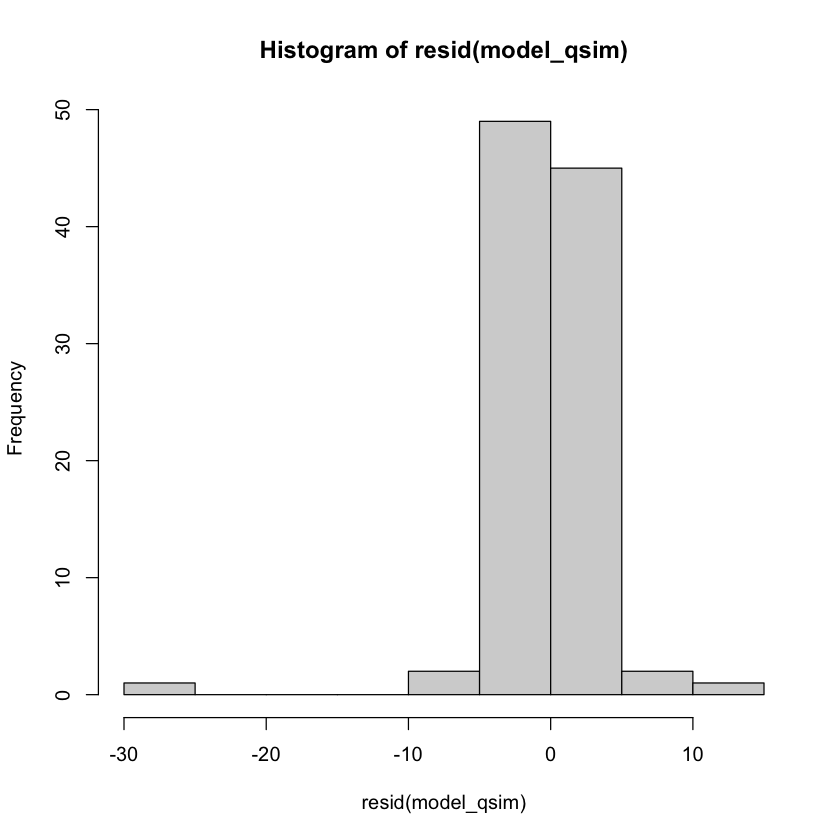

In [13]:
hist(resid(model_qsim))

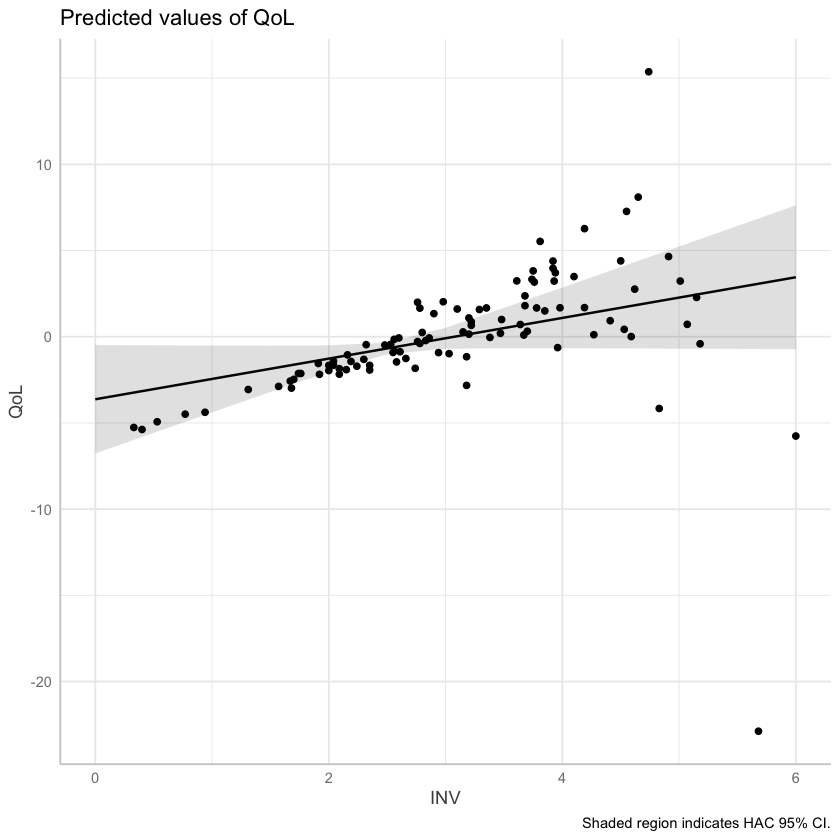

In [32]:
library(ggeffects)
library(sandwich)

reg1 = lm(QoL~INV, data = qsim)

a=plot(ggpredict(reg1, "INV", vcov.fun = "vcovHC"))

a+geom_point(data= qsim, aes(INV, QoL))+labs(caption = 'Shaded region indicates HAC 95% CI.')

In [24]:
library(sandwich)
library(lmtest)
diag(vcovHC(model_qsim,type="HC"))^0.5

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




(Intercept)         INV 
  1.5126165   0.5849504

In [29]:
coeftest(model_qsim,vcov=sandwich)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.62686    1.51262 -2.3977  0.01839 *
INV          1.17972    0.58495  2.0168  0.04645 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Clustered data

In [34]:
library(gee)

In [46]:
depression=readxl::read_xlsx("depression.xlsx")
head(depression)

diagnose,drug,id,time,depression
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mild,standard,1,0,1
mild,standard,1,1,1
mild,standard,1,2,1
mild,standard,2,0,1
mild,standard,2,1,1
mild,standard,2,2,1


In [40]:
glm_depression=
glm(data=depression,formula = depression ~ diagnose + drug * time,family = binomial)

summary(glm_depression)


Call:
glm(formula = depression ~ diagnose + drug * time, family = binomial, 
    data = depression)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4352  -1.0220   0.3254   0.9915   1.8009  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.08759    0.17747  -0.494    0.622    
diagnosesevere    -1.31391    0.14641  -8.974  < 2e-16 ***
drugstandard       0.05960    0.22221   0.268    0.789    
time               1.49986    0.15176   9.883  < 2e-16 ***
drugstandard:time -1.01744    0.18879  -5.389 7.08e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1411.9  on 1019  degrees of freedom
Residual deviance: 1161.9  on 1015  degrees of freedom
AIC: 1171.9

Number of Fisher Scoring iterations: 4


In [55]:
gee_depression=
gee(data=depression,
    formula = depression ~ diagnose + drug * time,family = binomial,
    id = id,
    corstr = "independence"
   )

Beginning Cgee S-function, @(#) geeformula.q 4.13 98/01/27

running glm to get initial regression estimate



      (Intercept)    diagnosesevere      drugstandard              time 
      -0.08759224       -1.31391092        0.05960381        1.49985707 
drugstandard:time 
      -1.01744498 


In [56]:
summary(gee_depression)


 GEE:  GENERALIZED LINEAR MODELS FOR DEPENDENT DATA
 gee S-function, version 4.13 modified 98/01/27 (1998) 

Model:
 Link:                      Logit 
 Variance to Mean Relation: Binomial 
 Correlation Structure:     Independent 

Call:
gee(formula = depression ~ diagnose + drug * time, id = id, data = depression, 
    family = binomial, corstr = "independence")

Summary of Residuals:
        Min          1Q      Median          3Q         Max 
-0.94844242 -0.40683252  0.05155758  0.38830952  0.80242231 


Coefficients:
                     Estimate Naive S.E.    Naive z Robust S.E.   Robust z
(Intercept)       -0.08759224  0.1761760 -0.4971859   0.1837224 -0.4767642
diagnosesevere    -1.31391092  0.1453432 -9.0400569   0.1459845 -9.0003423
drugstandard       0.05960381  0.2205812  0.2702126   0.2285385  0.2608042
time               1.49985707  0.1506459  9.9561766   0.1447922 10.3586857
drugstandard:time -1.01744498  0.1874132 -5.4288855   0.1876938 -5.4207709

Estimated Scale Parame

# Riesby data (for multilevel)

In [2]:
riesby=readxl::read_xlsx("Riesby.xlsx")%>%as.data.table()
head(riesby)

ID,HAMD,WK,ENDOG
<dbl>,<chr>,<dbl>,<dbl>
101,26,0,0
101,22,1,0
101,18,2,0
101,7,3,0
101,4,4,0
101,3,5,0


In [3]:
riesby[,HAMD:=as.double(HAMD)]

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”


In [26]:
head(riesby,20)

ID,HAMD,WK,ENDOG
<dbl>,<dbl>,<dbl>,<dbl>
101,26,0,0
101,22,1,0
101,18,2,0
101,7,3,0
101,4,4,0
101,3,5,0
103,33,0,0
103,24,1,0
103,15,2,0


In [11]:
model_hamd_lm=lm(HAMD~WK+ENDOG,data=riesby)
summary(model_hamd_lm)


Call:
lm(formula = HAMD ~ WK + ENDOG, data = riesby)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3703  -3.8010  -0.5645   3.8932  20.5742 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.5790     0.6372  35.434  < 2e-16 ***
WK           -2.4029     0.1808 -13.292  < 2e-16 ***
ENDOG         1.8614     0.6104   3.049  0.00246 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.885 on 372 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.3337,	Adjusted R-squared:  0.3301 
F-statistic: 93.17 on 2 and 372 DF,  p-value: < 2.2e-16


In [12]:
model_hamd_lm_interaction=lm(HAMD~WK*ENDOG,data=riesby)
summary(model_hamd_lm_interaction)


Call:
lm(formula = HAMD ~ WK * ENDOG, data = riesby)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3828  -3.7790  -0.5181   3.8960  20.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.51806    0.80270  28.053   <2e-16 ***
WK          -2.37842    0.26661  -8.921   <2e-16 ***
ENDOG        1.97408    1.08884   1.813   0.0706 .  
WK:ENDOG    -0.04543    0.36315  -0.125   0.9005    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.892 on 371 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.3338,	Adjusted R-squared:  0.3284 
F-statistic: 61.95 on 3 and 371 DF,  p-value: < 2.2e-16


In [10]:
library(sjPlot)

#refugeeswelcome



The data was collected in many schools. We would like to control for schools as a level 2 variable.
The naive way is to just include it in the model. The problem is, there are a lot of schools. This would be treating schools as a fixed effect.

In [14]:
model_hamd_lm_naive=lm(HAMD~WK+ENDOG+as.factor(ID),data=riesby)
summary(model_hamd_lm_naive)


Call:
lm(formula = HAMD ~ WK + ENDOG + as.factor(ID), data = riesby)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0786  -2.4824   0.1138   2.4780  16.1138 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.925e+01  1.816e+00  10.603  < 2e-16 ***
WK               -2.369e+00  1.354e-01 -17.492  < 2e-16 ***
ENDOG             1.192e+01  2.821e+00   4.224 3.16e-05 ***
as.factor(ID)103  7.333e+00  2.523e+00   2.906 0.003921 ** 
as.factor(ID)104 -8.417e+00  2.821e+00  -2.984 0.003076 ** 
as.factor(ID)105  1.333e+00  2.523e+00   0.528 0.597573    
as.factor(ID)106 -5.034e+00  2.932e+00  -1.717 0.087025 .  
as.factor(ID)107 -9.361e+00  2.932e+00  -3.193 0.001555 ** 
as.factor(ID)108 -1.208e+01  2.821e+00  -4.283 2.46e-05 ***
as.factor(ID)113  7.282e+00  2.647e+00   2.751 0.006293 ** 
as.factor(ID)114 -1.149e+00  2.647e+00  -0.434 0.664542    
as.factor(ID)115 -9.066e+00  2.932e+00  -3.092 0.0

## Using schools as random effects (lme4 package)

In [15]:
library(lme4)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [31]:
model_lme4=lme4::lmer(HAMD~WK+ENDOG+(1|ID),data=riesby)
summary(model_lme4)

Linear mixed model fit by REML ['lmerMod']
Formula: HAMD ~ WK + ENDOG + (1 | ID)
   Data: riesby

REML criterion at convergence: 2281.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1958 -0.6015 -0.0298  0.5496  3.4894 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 15.86    3.982   
 Residual             19.10    4.370   
Number of obs: 375, groups:  ID, 66

Fixed effects:
            Estimate Std. Error t value
(Intercept)  22.4999     0.8790  25.598
WK           -2.3753     0.1352 -17.571
ENDOG         1.8835     1.0873   1.732

Correlation of Fixed Effects:
      (Intr) WK    
WK    -0.382       
ENDOG -0.691  0.002

In [25]:
icc_model_lme4=3.982^2/(4.370^2+3.982^2)
icc_model_lme4

#we can also use library performance
library(performance)
performance::icc(model_lme4)

[1] 0.4536441

# Intraclass Correlation Coefficient

    Adjusted ICC: 0.454
  Unadjusted ICC: 0.306

In [23]:
sjPlot::tab_model(model_lme4)

This gives a nice summary of the model

# Galo data (multilevel random intercept)

In [1]:
library(lme4)
library(readxl)

Loading required package: Matrix



In [6]:
galo=read_xlsx("Galo.xlsx")